# Run Galfit on COSMOS galaxies
- 10/27/2020: Updated to use galfit_helpers.py module

### Load modules

In [1]:
from __future__ import division
import sys
sys.path.insert(0,'/data/emiln/XLSSC122_GalPops/Analysis/Modules')
from GalfitPyWrap import galfitwrap as gf
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import glob
from scipy import ndimage
from astropy import units as u
from astropy import wcs
from astropy.coordinates import SkyCoord
from astropy.io import fits, ascii
from astropy.table import Table, hstack, join
import pickle
import fnmatch
import multiprocessing as mp
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import galfit_helpers as gfh

### Load COSMOS galaxy catalog

In [3]:
COSMOS_cat_root = '/data/emiln/XLSSC122_GalPops/Data/Products/COSMOS/catalogs/'
COSMOS_cat_filename = COSMOS_cat_root+'cos_df_all_merged.csv'
full_df = gfh.load_COSMOS_galaxy_catalog(COSMOS_cat_filename,mag='F125W_Kron',magthresh=30, overwrite=False, verbose=True)
filtered_df = gfh.load_COSMOS_galaxy_catalog(COSMOS_cat_filename,magthresh=24, mag='F125W_Kron',overwrite=False, verbose=True)


Checking if catalog exists at /data/emiln/XLSSC122_GalPops/Data/COSMOS/Products/catalogs/magthresh30.csv
Catalog already exists, returning DataFrame
Checking if catalog exists at /data/emiln/XLSSC122_GalPops/Data/COSMOS/Products/catalogs/magthresh24.csv
Catalog already exists, returning DataFrame


In [4]:
z2_filtered_df = gfh.load_COSMOS_galaxy_catalog(COSMOS_cat_filename,magthresh=24, z=1.98,z_thresh=0.1,overwrite=False,verbose=True) 

Checking if catalog exists at /data/emiln/XLSSC122_GalPops/Data/COSMOS/Products/catalogs/magthresh24_z1.98_zthresh0.1.csv
Catalog already exists, returning DataFrame


In [11]:
print len(z2_filtered_df)
z2_filtered_df.columns.values
print len(filtered_df)

156
6715


### Set Galfit parameters

In [12]:
# fit_df = filtered_df[6:10]
fit_df = z2_filtered_df[4:8]
df_name = 'TEST_modular_galfit'
psf_root = '/data/emiln/XLSSC122_GalPops/Data/Products/COSMOS/PSF/'
psf_file = psf_root+'COSMOS/psfJ.fits' # J = F125W, H=F160W
PSFf = 1 
# convbox='40 40'
convbox='64 64'
image_width = 400 # 200 for mag<23 objects, 400 for z2 objects
timeout=2*60
verbose=True
width=10
HLRwidth=5 # Cutout width = 2*HLwidth
PA_INIT = 45
AR_INIT = 0.5
# zp = -21.1 # From header
ZP = 26.2303 # From https://archive.stsci.edu/pub/hlsp/candels/cosmos/cos-tot/v1.0/hlsp_candels_hst_cos-tot_readme_v1.0.pdf
MAG_INIT = 21
fitMagnitude = True
neighbourMagThresh=2
DYNMAG = True
sky='Default'
sky_INIT=0.00001
sigma_file = '/sigma_rms_meanexp_cps.fits'
data_file = '/data_cps.fits'
constraint_file = 'galfit_constr.txt' # Matches van der wel 2012 constraints
# constr_file = 'none'
badmask='none'
save_name = None

In [13]:
params = {
    'fit_df':fit_df, # Dataframe with objects to be fit
    'full_df':full_df, # Unfiltered source catalog used for fitting neighbours
    'width':width, # Fitting region width in pixels
    'HLRwidth':HLRwidth, # Fitting region width in # of HLR
    'sigma_file':sigma_file, # Filename of sigma maps for sources
    'data_file':data_file, # Filename for data cutouts for each source
    'PSF_file':psf_file, # File_name of PSF to be used
    'usePSF':True, # Use PSF in fitting?
    'timeout':timeout, # Max runtime per object in seconds
    'PSFf':PSFf, # Fine sampling factor
    'verbose':verbose, # Verbose mode
    'PA_INIT':PA_INIT, # Initial position angle
    'AR_INIT':AR_INIT, # Initial axis ratio
    'MAG_INIT':MAG_INIT, # Initial magnitude
    'convbox':convbox, # Region to convolve PSF with in pixels (i.e. '100 100')
    'ZP':ZP, # Zeropoint 
    'constraint_file':constraint_file, # Galfit constraint filename
    'image_width':image_width, # Size of data+sigma images being used (200 for COSMOS cutouts)
    'useDYNMAG':DYNMAG, # Initialize magnitudes from catalog?
    'badmask':badmask, # filename for bad pixel mask
    'fitMagnitude':fitMagnitude, # Fit magnitudes?
    'sky':sky, # Sky fitting mode for galfit (i.e. 'default')
    'sky_INIT':sky_INIT, # Initial sky level
    'neighbourMagThresh':neighbourMagThresh, # Additional magnitude threshhold to fit neighbours (i.e. 3 -> only neighbours with mag < source_mag+3 are fit)
    'df_name': df_name, # Descriptive name of catalog being fit
    'save_name':save_name # Filename to save results to, overrides default
}

### Run Galfit

In [14]:
new_df, savename = gfh.run_galfit_parallel(params,**params) # Feeds in unwrapped params as well as a copy to be passed as kwargs to sub functions

***COSMOS***
Initializing 864 with F125W Kron magnitude: 23.54
ID 864
RA: 150.1905054
DEC: 2.1906496
Initial X: 2952.7053051
Initial Y: 8581.20036173
Cutout X: 400
Cutout Y: 400
Cutout width: 400
Cutoutwidth (pixels) for ID 864 : 58
Cutoutwidth (arcsec) for ID 864 : 3.48
Bounds: [371, 429, 371, 429]
0 NEIGHBOURS FOUND
Adding additional model components for neighbours...
Using PSF
Running galfit from CWD: /data/emiln/XLSSC122_GalPops/Data/Products/COSMOS/galfit_results/864
***COSMOS***
Initializing 998 with F125W Kron magnitude: 22.71
ID 998
RA: 150.1667145
DEC: 2.1916337
Initial X: 4379.11951068
Initial Y: 8640.18709886
Cutout X: 400
Cutout Y: 400
Cutout width: 400
Cutoutwidth (pixels) for ID 998 : 96
Cutoutwidth (arcsec) for ID 998 : 5.76
Bounds: [352, 448, 352, 448]
0 NEIGHBOURS FOUND
Adding additional model components for neighbours...
SAVE_NAME:TEST_modular_galfit_data_cps_sigma_rms_meanexp_cps_w5HLR_psfJ_2min_CONV64_CONSTR_DYNMAG
Using PSF
Running galfit from CWD: /data/emiln/XLSS

### Validate results

In [15]:
new_df

,ID,ra,dec,re,re_err,ar,ar_err,n,n_err,mag,mag_err,sky,sky_err,chi2nu,ErrorValue
0,864,150.190505,2.190650,6.1977,0.1396,0.4893,0.0097,0.9089,0.0500,23.4078,0.0142,-0.001283,0.000096,0.173139,0
1,998,150.166715,2.191634,11.6621,0.1236,0.2669,0.0034,0.6101,0.0224,22.7223,0.0088,-0.000707,0.000054,0.298001,0
2,1359,150.162772,2.196018,2.7419,0.1427,0.7045,0.0195,3.8840,0.3515,22.6470,0.0319,-0.001971,0.000255,0.278740,0
3,1918,150.138919,2.202854,5.0597,0.1241,0.3099,0.0116,0.6452,0.0704,23.9102,0.0164,-0.000416,0.000133,0.239487,0


    ID          ra      dec      re  re_err      ar  ar_err       n  n_err  \
0  864  150.190505  2.19065  6.1977  0.1396  0.4893  0.0097  0.9089   0.05   

       mag  mag_err       sky   sky_err    chi2nu  ErrorValue  
0  23.4078   0.0142 -0.001283  0.000096  0.173139           0  


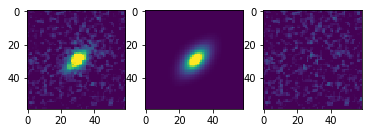

    ID          ra       dec       re  re_err      ar  ar_err       n   n_err  \
1  998  150.166715  2.191634  11.6621  0.1236  0.2669  0.0034  0.6101  0.0224   

       mag  mag_err       sky   sky_err    chi2nu  ErrorValue  
1  22.7223   0.0088 -0.000707  0.000054  0.298001           0  


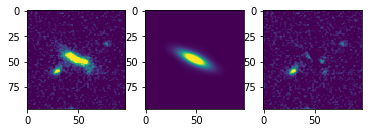

     ID          ra       dec      re  re_err      ar  ar_err      n   n_err  \
2  1359  150.162772  2.196018  2.7419  0.1427  0.7045  0.0195  3.884  0.3515   

      mag  mag_err       sky   sky_err   chi2nu  ErrorValue  
2  22.647   0.0319 -0.001971  0.000255  0.27874           0  


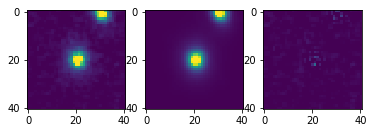

     ID          ra       dec      re  re_err      ar  ar_err       n   n_err  \
3  1918  150.138919  2.202854  5.0597  0.1241  0.3099  0.0116  0.6452  0.0704   

       mag  mag_err       sky   sky_err    chi2nu  ErrorValue  
3  23.9102   0.0164 -0.000416  0.000133  0.239487           0  


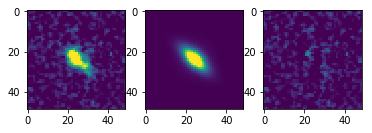

In [16]:
# Plot fits by ID
for ID in fit_df['ID']:
    gfh.plot_by_ID(ID,save_name=savename,survey='COSMOS')

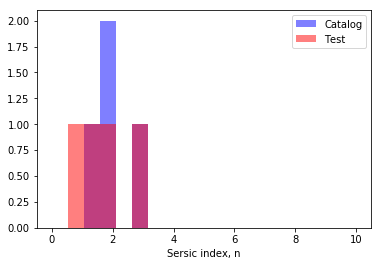

3.0011


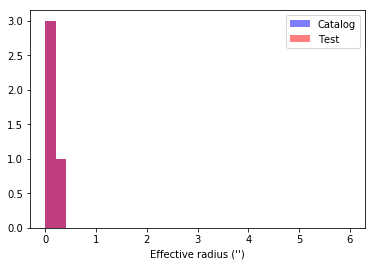

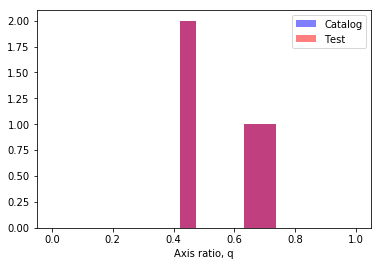

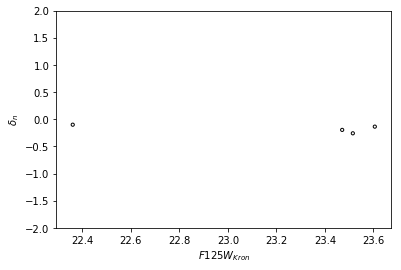

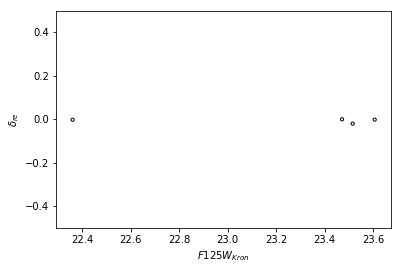

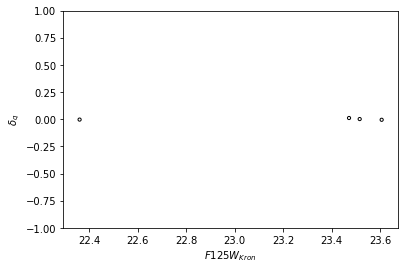

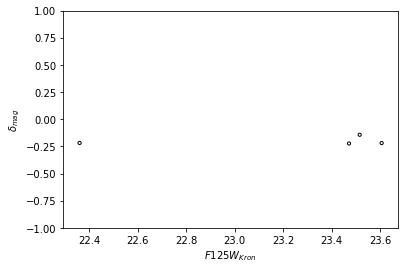

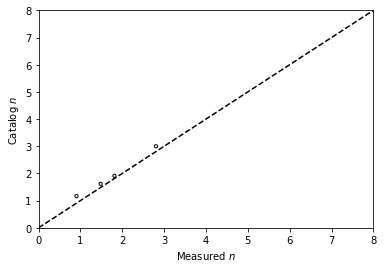

Mean abs dex difference between measured and catalog n: 0.04980086054021918
Median abs dex difference between measured and catalog n: 0.03356552915286526
Mean abs diff between measured and catalog n: 0.17202500000000007
Median abs diff between measured and catalog n: 0.16525000000000023
Mean difference between measured and catalog n: -0.17202500000000007
Median difference between measured and catalog n: -0.16525000000000023
STD of difference between measured and catalog n: 0.06025547174323671
Median offset in delta(n)/n in dex: -0.13195845627792896
Scatter in in delta(n)/n in dex: 0.6700475421261348


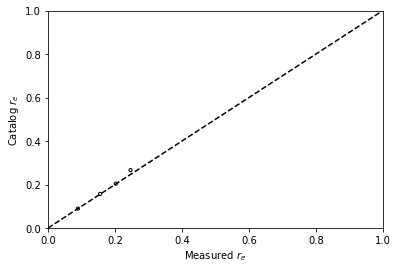

Mean offset between measured and cataloged re (percentage): -2.39
Mean abs offset between measured and cataloged re (percentage): 2.39
Median offset between measured and cataloged re (percentage): -1.0
Median abs offset between measured and cataloged re (percentage): 1.0
Mean abs dex difference between measured and catalog re: 0.010715667357259373
Median abs dex difference between measured and catalog re: 0.0043464432506557515
Mean abs diff between measured and catalog re: 0.005899500000000009
Median abs diff between measured and catalog re: 0.001791000000000001
Mean difference between measured and catalog re: -0.005899500000000009
Median difference between measured and catalog re: -0.001791000000000001


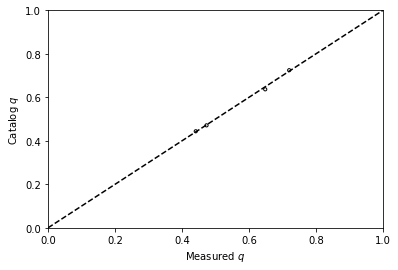

Mean dex difference between measured and catalog q: 0.0038375182551727213
Median dex difference between measured and catalog q: 0.002756577440224728
Mean abs dex diff between measured and catalog n: 0.0038375182551727213
Median abs dex diff between measured and catalog n: 0.002756577440224728
Mean dex difference between measured and catalog q: 0.0010809408149479935
Median dex difference between measured and catalog q: -0.00040843227900527745


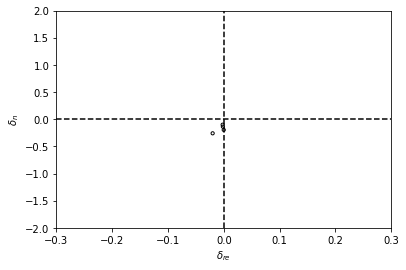

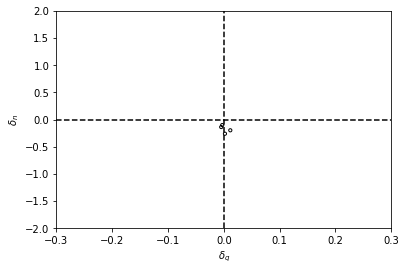

In [26]:
# Compare COSMOS results to published catalog
# cos_df = gfh.load_COSMOS_published_cat()

gfh.compare_COSMOS(savename,fit_df,sky_test=False)